## Time Series Forecasting

This is my ATM Project (Amati (observe), Tiru (imitate), Modifikasi (modification))
Learn into ML DL AI as the beginner to be a hero!

In this case, we want to predict views of wikipedia article in the future. (NOT YET FINISHED)

### Import Libraries

In [118]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
from statsmodels.tsa.seasonal import seasonal_decompose # time series model
from statsmodels.tsa.stattools import adfuller # test the null hypothesis
from statsmodels.tsa.arima.model import ARIMA # TS Model

### Import Dataset

In [119]:
dt = pd.read_csv('data_input/ts/wikiviews.csv', parse_dates = ['date'])
dt.head()

,project,article,access,agent,granularity,date,en_views,id_views
0,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-01,939,711
1,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-02,974,640
2,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-03,616,604
3,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-04,569,576
4,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-05,651,581


Below is the description of our data

- project: indicates the project or platform where the data is collected from.
- article: represents the specific article or content item on the platform. 
- access: the type of access method used to view the article.
- agent: contain information about the user agent or software.

- granularity: indicate whether the viewing statistics are aggregated daily, hourly, or at some other interval.
- date: provides the temporal aspect of the data.
- en_views: contains the number of views or visits to the article from English-speaking users. 
- id_views: contain the number of views or visits to the article from users with a specific ID or identifier. 

### EDA

##### Get year

In [120]:
dt['year'] = dt['date'].dt.year

##### Get months name

In [121]:
dt['month'] = dt['date'].dt.month_name()

##### Get day

In [122]:
dt['day'] = dt['date'].dt.day_name()

In [123]:
dt.head()

,project,article,access,agent,granularity,date,en_views,id_views,year,month,day
0,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-01,939,711,2015,July,Wednesday
1,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-02,974,640,2015,July,Thursday
2,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-03,616,604,2015,July,Friday
3,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-04,569,576,2015,July,Saturday
4,wikipedia,Joko_Widodo,all-access,all-agents,daily,2015-07-05,651,581,2015,July,Sunday


##### Check date datatypes

In [124]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   project      1158 non-null   object        
 1   article      1158 non-null   object        
 2   access       1158 non-null   object        
 3   agent        1158 non-null   object        
 4   granularity  1158 non-null   object        
 5   date         1158 non-null   datetime64[ns]
 6   en_views     1158 non-null   int64         
 7   id_views     1158 non-null   int64         
 8   year         1158 non-null   int64         
 9   month        1158 non-null   object        
 10  day          1158 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 99.6+ KB


In [125]:
# change data type
dt[['project', 'article', 'access', 'agent', 'granularity', 'year', 'month', 'day']] = dt[['project', 'article', 'access', 'agent', 'granularity', 'year', 'month', 'day']] .astype("category")



##### Missing value

In [126]:
dt.isnull().any()

project        False
article        False
access         False
agent          False
granularity    False
date           False
en_views       False
id_views       False
year           False
month          False
day            False
dtype: bool

##### Duplicate

In [127]:
dt.duplicated().any()

False

##### Graph

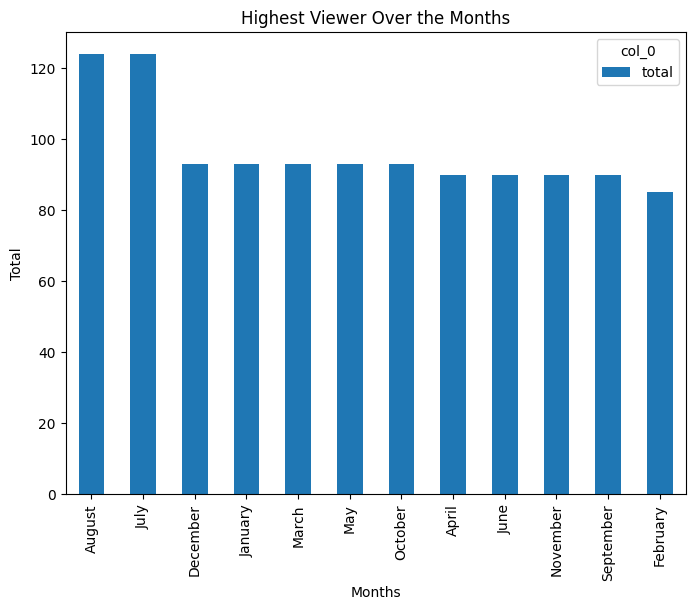

In [128]:
# which months has highest viewer
mon = pd.crosstab(index = dt['month'],
           columns = 'total').sort_values(by = 'total', ascending = False)

mon.plot(kind = "bar", figsize = (8,6))
plt.title("Highest Viewer Over the Months")
plt.xlabel("Months")
plt.ylabel("Total")
plt.show()

In [129]:
# which days has highest viewer
dt.day.value_counts()

Friday       166
Thursday     166
Wednesday    166
Monday       165
Saturday     165
Sunday       165
Tuesday      165
Name: day, dtype: int64

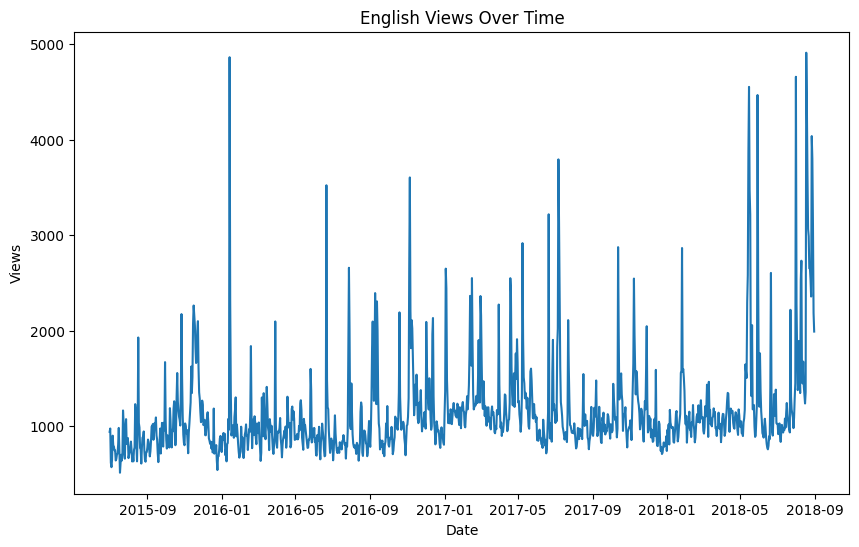

In [130]:
plt.figure(figsize = (10, 6))
plt.plot(dt["date"], dt['en_views']) # plotting views
plt.title('English Views Over Time') # title of figure
plt.xlabel('Date') # x axis label
plt.ylabel('Views') # y axis label
plt.show()

We can conclude that August and July is the favorite month of people open the article. They read the article on Wednesday, Thursday, and Friday. Viewer increases over the time.

### Time Series

In [131]:
# check whether our data is stationary or not
res = adfuller(dt['date'])
res

print('ADF Statistic:', res[0])
print('p-value:', res[1])

ADF Statistic: -13.271130989613079
p-value: 8.033323058567591e-25


p-value is less than 0.05, we can say our data is stationary. It means the mean are constant over the time.

In [132]:
# fitting model with ARIMA
ts_dt = dt['en_views']

# ARIMA model parameters (p, d, q)
p = 5  # AutoRegressive (AR) order
d = 1  # Differencing order
q = 0  # Moving Average (MA) order

mdl = ARIMA(ts_dt, order=(p, d, q))
mdl_fit = mdl.fit()

- p: The number of lag observations included in the model, also known as the AutoRegressive (AR) order. It captures the linear relationship between the current observation and its p number of lagged observations.
- d: The degree of differencing, which is the number of times the raw observations are differenced to make the time series stationary. Differencing is used to remove the trend or seasonality from the time series data.
- q: The size of the moving average window, also known as the Moving Average (MA) order. It captures the relationship between the current observation and the residuals from the moving average model applied to lagged observations.

In [134]:
# make forecast
forecast_steps = 20
forecast = mdl_fit.forecast(steps=forecast_steps)
print(forecast)

1158    2312.556149
1159    2617.709397
1160    2700.700516
1161    2650.158361
1162    2545.021371
1163    2487.815438
1164    2498.591343
1165    2534.009279
1166    2555.453629
1167    2557.260217
1168    2547.424761
1169    2538.275157
1170    2536.038897
1171    2538.827110
1172    2542.033512
1173    2543.322795
1174    2542.777760
1175    2541.668321
1176    2541.048002
1177    2541.108353
Name: predicted_mean, dtype: float64


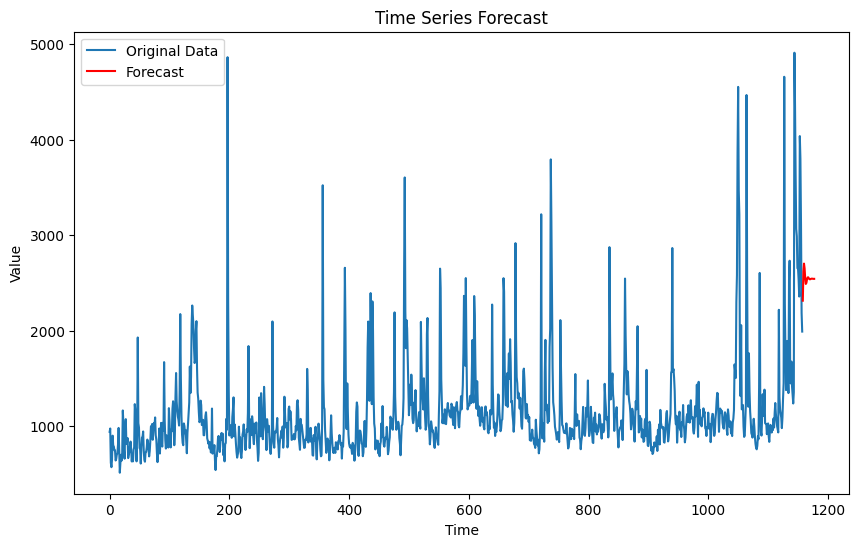

In [139]:
# compare old data with forecasted data

plt.figure(figsize = (10,6))
plt.plot(dt["en_views"], label='Original Data')
plt.plot(range(len(dt["en_views"]), \
               len(dt["en_views"]) + len(forecast)), \
         forecast, color='red', label='Forecast')
plt.title('Time Series Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()